In [26]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.animation as animation
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

# Visualizando os Dados de Emoções

Este notebook carrega os dados de emoções do `db.json` e gera gráficos dinâmicos e visualmente atraentes usando Seaborn, Matplotlib, Plotly e uma animação de onda senoidal.

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_13308\338438646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Count', data=df, palette=colors)
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_13308\338438646.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Emotion', y='Count', data=df, palette=colors)


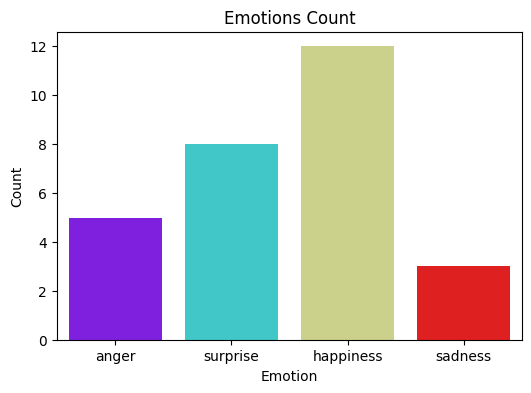

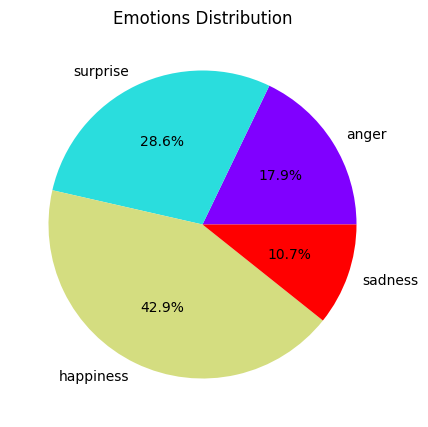

In [ ]:
with open('db.json', 'r') as f:
    emotions = json.load(f)["emotions"]
df = pd.DataFrame(list(emotions.items()), columns=['Emotion', 'Count'])

colors = cm.rainbow(np.linspace(0, 1, len(df)))

plt.figure(figsize=(6,4))
sns.barplot(x='Emotion', y='Count', data=df, palette=colors)
plt.title('Emotions Count')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5,5))
plt.pie(df['Count'], labels=df['Emotion'], autopct='%1.1f%%', colors=colors)
plt.title('Emotions Distribution')
plt.show()

fig_bar = px.bar(df, x='Emotion', y='Count', color='Emotion',
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 title='Emotions Count (Plotly)', text='Count')
fig_bar.update_layout(template='plotly_dark', xaxis_title='Emotion', yaxis_title='Count')
fig_bar.show()

fig_pie = px.pie(df, names='Emotion', values='Count',
                 color_discrete_sequence=px.colors.sequential.Rainbow,
                 title='Emotions Distribution (Plotly)')
fig_pie.update_traces(textinfo='percent+label')
fig_pie.update_layout(template='plotly_dark')
fig_pie.show()

# Como importar o gráfico para uma página web

Para exibir gráficos do Python em uma página web, você pode:

1. Salvar o gráfico como imagem (PNG, JPG) usando `plt.savefig('grafico.png')` e depois inserir a imagem no HTML com `<img src="grafico.png">`.
2. Usar bibliotecas interativas como Plotly ou Bokeh, que permitem exportar gráficos como HTML interativo.
3. Converter o notebook para HTML usando `jupyter nbconvert dashboard.ipynb --to html` e incorporar o HTML gerado na sua página.

Exemplo para salvar como imagem:
```python
plt.savefig('grafico.png')
```
Depois, use no HTML:
```html
<img src="grafico.png" alt="Gráfico de Emoções">
```

In [ ]:
import plotly.graph_objects as go
import json

data_json = {
    "emotions": {
        "anger": 5,
        "surprise": 8,
        "happiness": 12,
        "sadness": 3
    }
}

emotions = list(data_json["emotions"].keys())
values = list(data_json["emotions"].values())

colors = ['#FF6347', '#FFD700', '#32CD32', '#6A5ACD']

fig = go.Figure(data=[go.Bar(
    x=emotions,
    y=values,
    marker_color=colors,
    text=values,
    textposition='auto',
    hoverinfo='text',
    hovertext=[f'Emoção: {e}<br>Valor: {v}' for e, v in zip(emotions, values)]
)])

fig.update_layout(
    title_text='Distribuição de Emoções',
    title_x=0.5,
    xaxis_title='Emoção',
    yaxis_title='Intensidade',
    font=dict(
        family="Inter, sans-serif",
        size=14,
        color="#333"
    ),
    plot_bgcolor='white',
    paper_bgcolor='#f9f9f9',
    margin=dict(l=50, r=50, t=80, b=50),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Inter, sans-serif"
    ),
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=False,
            buttons=list([
                dict(label="Play",
                     method="animate",
                     args=[None, {"frame": {"duration": 500, "redraw": True},
                                  "fromcurrent": True, "transition": {"duration": 300, "easing": "quadratic-in-out"}}])
            ]),
        )
    ]
)

frames = []
max_value = max(values)
for i in range(1, max_value + 1, 1):
    current_values = [min(v, i) for v in values]
    frames.append(go.Frame(data=[go.Bar(x=emotions, y=current_values, marker_color=colors)]))

fig.frames = frames

html_chart = fig.to_html(full_html=False, include_plotlyjs='cdn')

print(html_chart)

with open("emotions_bar_chart.html", "w", encoding="utf-8") as f:
    f.write(fig.to_html(full_html=True, include_plotlyjs='cdn'))

print("\nO código HTML do gráfico foi gerado acima.")
print("Um arquivo completo 'emotions_bar_chart.html' também foi salvo.")

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script charset="utf-8" src="https://cdn.plot.ly/plotly-3.0.1.min.js"></script>                <div id="84fadd25-3590-4179-81ef-1249721067d1" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                window.PLOTLYENV=window.PLOTLYENV || {};                                if (document.getElementById("84fadd25-3590-4179-81ef-1249721067d1")) {                    Plotly.newPlot(                        "84fadd25-3590-4179-81ef-1249721067d1",                        [{"hoverinfo":"text","hovertext":["Emoção: anger\u003cbr\u003eValor: 5","Emoção: surprise\u003cbr\u003eValor: 8","Emoção: happiness\u003cbr\u003eValor: 12","Emoção: sadness\u003cbr\u003eValor: 3"],"marker":{"color":["#FF6347","#FFD700","#32CD32","#6A5ACD"]},"text":["5","8","12","3"],"textposition":"auto","x":["anger","surprise","happiness","sad